In [1]:
import nltk
# nltk.download("movie_reviews")
import numpy as np
from nltk.corpus import movie_reviews 
import pandas as pd
from nltk.corpus import twitter_samples 
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop = stopwords.words('english')
import string
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegressionCV

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vritansh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/vritansh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv("scraped_tweets.csv", )

In [30]:
df.describe()


In [4]:
df.columns


Index(['Unnamed: 0', 'username', 'description', 'location', 'following',
       'followers', 'totaltweets', 'retweetcount', 'text', 'hashtags'],
      dtype='object')

,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,LeGuideDuSecOps,Blog 🇫🇷 publiant des articles en #Cybersecurit...,Clouds,59,564,1672,0,ChatGPT https://t.co/aEUQKw2Nz3,[]
1,mxhmcmahon,Postdoctoral Research Fellow @EmoryPediatrics ...,"Atlanta, GA",226,92,44,0,Everyone’s talking about ChatGPT yet I’m still...,"['ai', 'research']"
2,joe39539881,"Identifying, training, & equiping the next gen...","Rialto USD, So Cal, USA",52,4,235,20,I challenged ChatGPT - can it replace Hackers...,[]
3,xHardcQre,Technnology enthusiast. Developer.,"Thessaloniki, Greece",38,45,24,0,"AI you are drunk, go home. #ChatGPT #AI https:...","['ChatGPT', 'AI']"
4,duke_unreal,NaN,NaN,5003,1653,283938,20,"AI is good now.\n\n""This Oddly Polite Chatbot ...",[]
...,...,...,...,...,...,...,...,...,...
95,FrankSchuil,CEO & co-founder crypto exchange @SafelloAB (O...,Sweden,1097,4539,4937,0,Reads like ChatGPT makes both for a great and ...,[]
96,vishn0o,☭\n\n| Visca Barca |,Kerala,780,331,5682,2,@cuihua @OpenAI #ChatGPT prompt: \n\nWrite an ...,['ChatGPT']
97,_0xzero,Jim Cramer hater | ex Niftey junky,United Kingdom,366,289,11225,0,It’s me and chatgpt vs the world,[]
98,EdFromYorkshire,NaN,North Yorkshire,134,94,804,97,Just one way to profit off chatgpt\n\nThe worl...,[]


In [6]:
df.isna().sum()

Unnamed: 0       0
username         0
description     14
location        31
following        0
followers        0
totaltweets      0
retweetcount     0
text             0
hashtags         0
dtype: int64

In [7]:
df.isnull().sum()

Unnamed: 0       0
username         0
description     14
location        31
following        0
followers        0
totaltweets      0
retweetcount     0
text             0
hashtags         0
dtype: int64

In [24]:
df

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,LeGuideDuSecOps,Blog 🇫🇷 publiant des articles en #Cybersecurit...,Clouds,59,564,1672,0,ChatGPT https://t.co/aEUQKw2Nz3,[]
1,1,mxhmcmahon,Postdoctoral Research Fellow @EmoryPediatrics ...,"Atlanta, GA",226,92,44,0,Everyone’s talking about ChatGPT yet I’m still...,"['ai', 'research']"
2,2,joe39539881,"Identifying, training, & equiping the next gen...","Rialto USD, So Cal, USA",52,4,235,20,I challenged ChatGPT - can it replace Hackers...,[]
3,3,xHardcQre,Technnology enthusiast. Developer.,"Thessaloniki, Greece",38,45,24,0,"AI you are drunk, go home. #ChatGPT #AI https:...","['ChatGPT', 'AI']"
4,4,duke_unreal,NaN,NaN,5003,1653,283938,20,"AI is good now.\n\n""This Oddly Polite Chatbot ...",[]
...,...,...,...,...,...,...,...,...,...,...
95,95,FrankSchuil,CEO & co-founder crypto exchange @SafelloAB (O...,Sweden,1097,4539,4937,0,Reads like ChatGPT makes both for a great and ...,[]
96,96,vishn0o,☭\n\n| Visca Barca |,Kerala,780,331,5682,2,@cuihua @OpenAI #ChatGPT prompt: \n\nWrite an ...,['ChatGPT']
97,97,_0xzero,Jim Cramer hater | ex Niftey junky,United Kingdom,366,289,11225,0,It’s me and chatgpt vs the world,[]
98,98,EdFromYorkshire,NaN,North Yorkshire,134,94,804,97,Just one way to profit off chatgpt\n\nThe worl...,[]


# Preprocessing

In [8]:
# code here
def remove_all_punctuations(data):
    lst = []
    for review in data:
        tokenized = word_tokenize(review)
        considered_word = [word for word in tokenized if not word in all_punctuations]
        considered_word = " ".join(considered_word)
        lst.append(considered_word)
    return lst

In [9]:
all_punctuations =  list(string.punctuation)


In [10]:
# code here
def remove_all_punctuations(data):
    lst = []
    for review in data:
        tokenized = word_tokenize(review)
        considered_word = [word for word in tokenized if not word in all_punctuations]
        considered_word = " ".join(considered_word)
        lst.append(considered_word)
    return lst

In [13]:
drop_columns = ['username', 'Unnamed: 0']
data = df.drop(columns= drop_columns)

In [14]:
data.head()

,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,Blog 🇫🇷 publiant des articles en #Cybersecurit...,Clouds,59,564,1672,0,ChatGPT https://t.co/aEUQKw2Nz3,[]
1,Postdoctoral Research Fellow @EmoryPediatrics ...,"Atlanta, GA",226,92,44,0,Everyone’s talking about ChatGPT yet I’m still...,"['ai', 'research']"
2,"Identifying, training, & equiping the next gen...","Rialto USD, So Cal, USA",52,4,235,20,I challenged ChatGPT - can it replace Hackers...,[]
3,Technnology enthusiast. Developer.,"Thessaloniki, Greece",38,45,24,0,"AI you are drunk, go home. #ChatGPT #AI https:...","['ChatGPT', 'AI']"
4,NaN,NaN,5003,1653,283938,20,"AI is good now.\n\n""This Oddly Polite Chatbot ...",[]


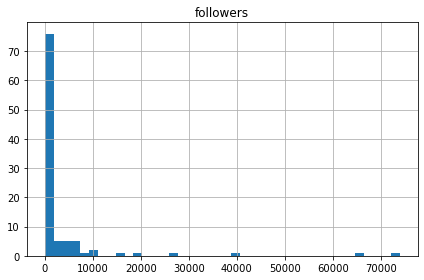

In [23]:
data.hist(column=['followers'],bins=40)
plt.tight_layout()
plt.show()

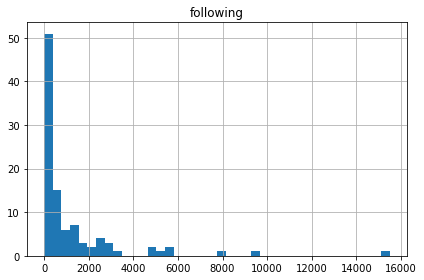

In [24]:
data.hist(column=['following'],bins=40)
plt.tight_layout()
plt.show()

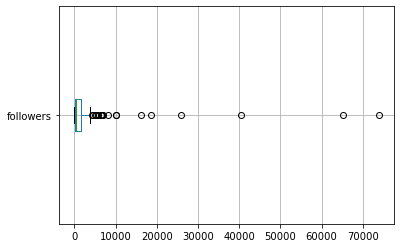

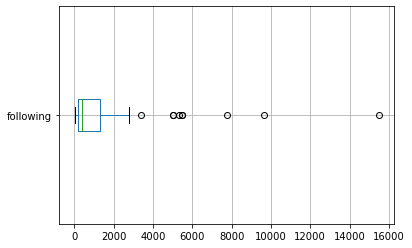

In [27]:
data.boxplot(column=['followers'],vert=False)
plt.show()
data.boxplot(column=['following'],vert=False)
plt.show()



In [7]:
grouped = df.groupby("username").size()

In [12]:
print(grouped)

username
0xm1cro          1
22CREAM28        1
ANCarrillo964    1
Abhi2jit1        1
AllardThuriot    1
                ..
wolfcominc       1
xHardcQre        1
xslursx          1
yosoyMH          1
zehavoc          1
Length: 91, dtype: int64


In [15]:
for i , j in grouped.items:
    print(i)

TypeError: 'method' object is not iterable